In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv("PriceRangeofHDBFlatsOffered.csv")
print(df)

     financial_year         town room_type min_selling_price  \
0              2008      Punggol    2-room             82000   
1              2008      Punggol    3-room            135000   
2              2008      Punggol    4-room            223000   
3              2008      Punggol    5-room            305000   
4              2008  Jurong West    3-room            142000   
..              ...          ...       ...               ...   
328            2023       Tengah    5-room            454000   
329            2023    Woodlands    2-room            119000   
330            2023    Woodlands    3-room            223000   
331            2023    Woodlands    4-room            303000   
332            2023    Woodlands    5-room            412000   

    max_selling_price min_selling_price_less_ahg_shg  \
0              107000                              0   
1              211000                              0   
2              327000                              0   
3      

In [5]:
price_columns = ['min_selling_price', 'max_selling_price']

# Convert the price columns from string to integer
for column in price_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [6]:
#Remove columns 'min_selling_price_less_ahg_shg' & 'max_selling_price_less_ahg_shg' as it is not relevant to our study.

columns_to_remove = ['min_selling_price_less_ahg_shg', 'max_selling_price_less_ahg_shg']
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

#Add new column for average selling price. [(Min selling price)+(Max selling price)]/2

df['average_selling_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2

print(df)

     financial_year         town room_type  min_selling_price  \
0              2008      Punggol    2-room            82000.0   
1              2008      Punggol    3-room           135000.0   
2              2008      Punggol    4-room           223000.0   
3              2008      Punggol    5-room           305000.0   
4              2008  Jurong West    3-room           142000.0   
..              ...          ...       ...                ...   
328            2023       Tengah    5-room           454000.0   
329            2023    Woodlands    2-room           119000.0   
330            2023    Woodlands    3-room           223000.0   
331            2023    Woodlands    4-room           303000.0   
332            2023    Woodlands    5-room           412000.0   

     max_selling_price  average_selling_price  
0             107000.0                94500.0  
1             211000.0               173000.0  
2             327000.0               275000.0  
3             428000.0     

In [7]:
#Focusing on the study of just 4 room flats.

df = df[df['room_type'] != '2-room']
df = df[df['room_type'] != '3-room']
df = df[df['room_type'] != '5-room']

print(df)  # Display DataFrame after column removal

     financial_year           town room_type  min_selling_price  \
2              2008        Punggol    4-room           223000.0   
5              2008    Jurong West    4-room           211000.0   
9              2008  Bukit Panjang    4-room           211000.0   
11             2008      Woodlands    4-room           184000.0   
15             2008       Sengkang    4-room           190000.0   
..              ...            ...       ...                ...   
315            2023        Hougang    4-room           371000.0   
319            2023    Jurong West    4-room           315000.0   
323            2023        Punggol    4-room           318000.0   
327            2023         Tengah    4-room           350000.0   
331            2023      Woodlands    4-room           303000.0   

     max_selling_price  average_selling_price  
2             327000.0               275000.0  
5             253000.0               232000.0  
9             270000.0               240500.0  
11 

Text(0.5, 0, 'Financial Year')

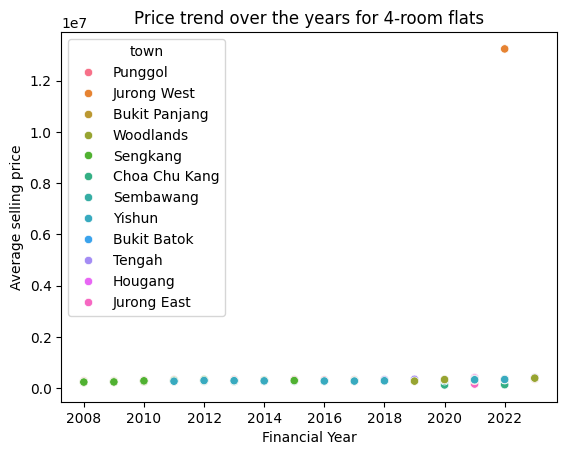

In [8]:
#plotting scatter data. notice the anomaly/outlier for Jurong west 4 room year 2022

sns.scatterplot(data=df, x='financial_year', y='average_selling_price', hue='town')
plt.title('Price trend over the years for 4-room flats')
plt.ylabel("Average selling price")
plt.xlabel("Financial Year")

In [9]:
# find the index position of the anomaly/outlier

df['average_selling_price'].idxmax()

291

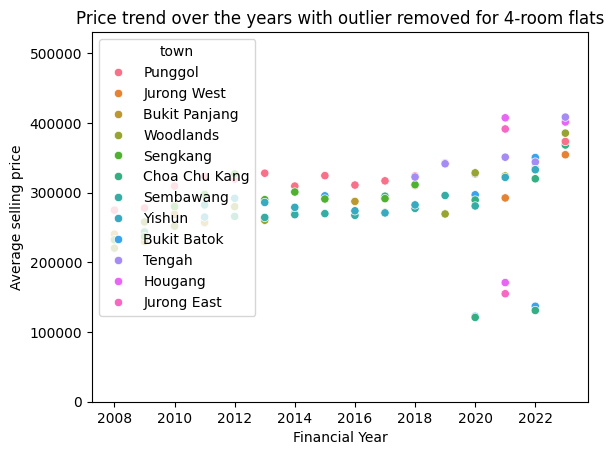

In [10]:
#after identifying the anomaly/outlier, plot the scatter graph again with anomaly/outlier removed

sns.scatterplot(data=df, x='financial_year', y='average_selling_price', hue='town')
plt.title('Price trend over the years with outlier removed for 4-room flats')
plt.ylabel("Average selling price")
plt.xlabel("Financial Year")

#limiting the data for average selling price between 0 to 530500 to remove anomaly/outlier

plt.ylim([0, 530500])

plt.show()

<Axes: title={'center': 'Price trend over the years for 4 room flats in Punggol'}, xlabel='financial_year', ylabel='average_selling_price'>

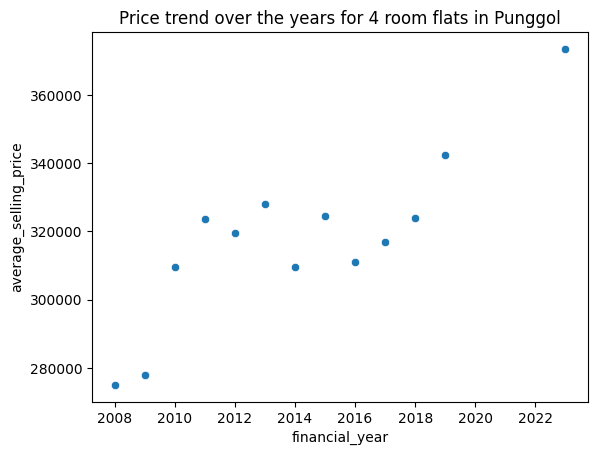

In [12]:
#plotting scatter graph for Punggol only

df_punggol = df[df['town'] == 'Punggol']

plt.title('Price trend over the years for 4 room flats in Punggol')

sns.scatterplot(data=df_punggol, x='financial_year', y='average_selling_price')

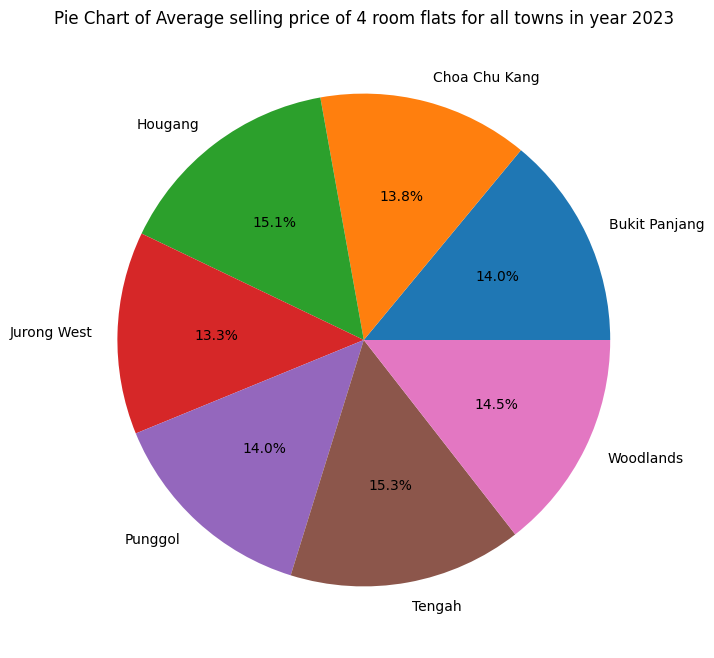

In [15]:
#create pie chart of average selling price of 4 room flats for all towns in year 2023

df_2023 = df[df['financial_year'] == 2023]

plt.figure(figsize=(8, 8))
plt.pie(df_2023['average_selling_price'], labels=df_2023['town'], autopct='%1.1f%%')

plt.title('Pie Chart of Average selling price of 4 room flats for all towns in year 2023')
plt.show()

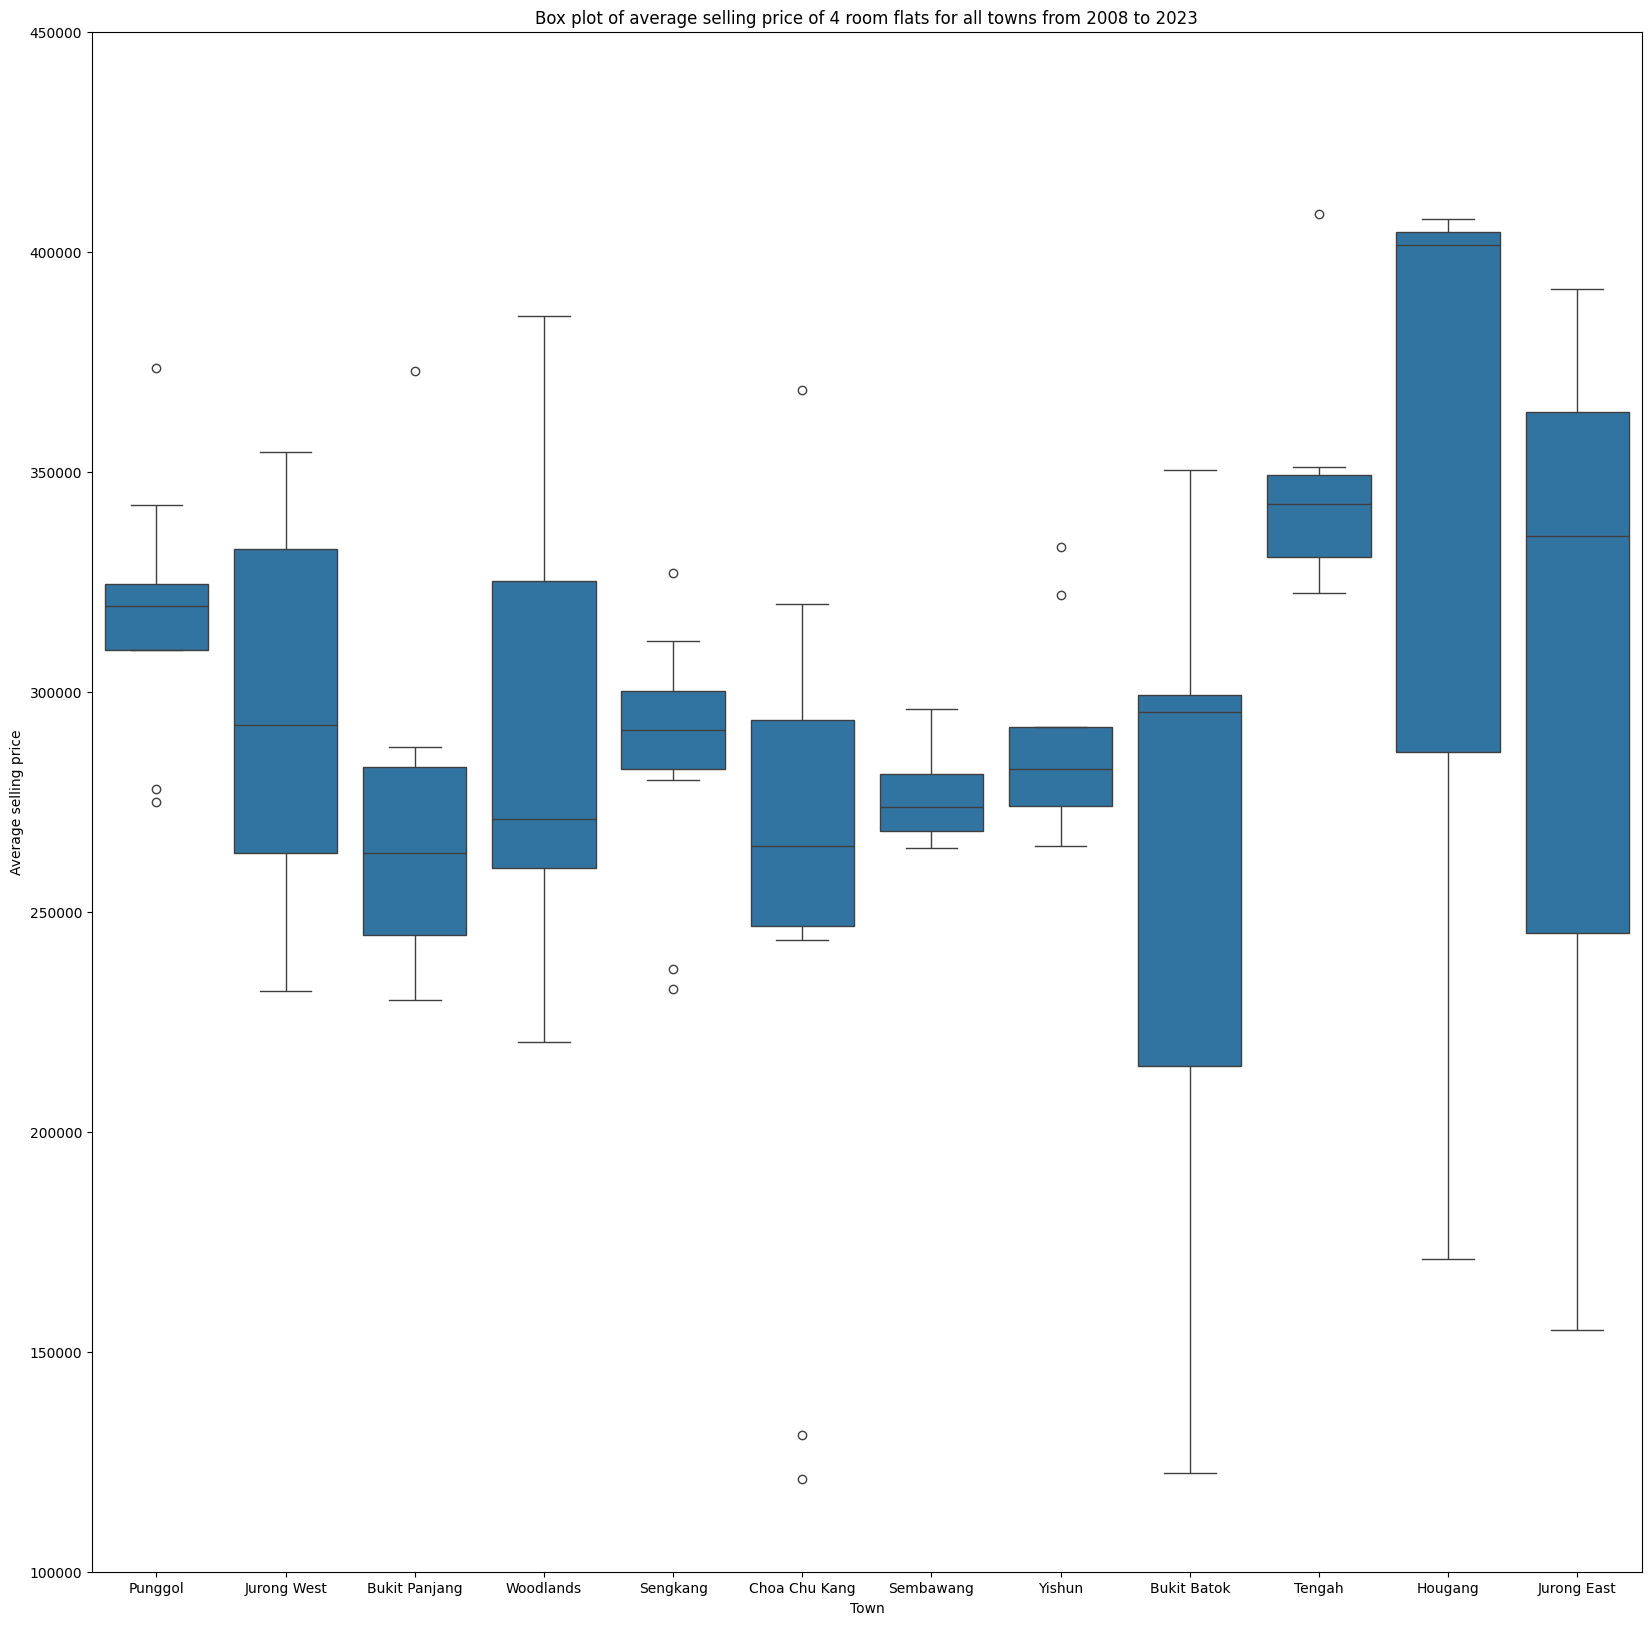

In [21]:
#create box plot of average selling price of 4 room flats for all towns from 2008 to 2023

plt.figure(figsize=(20, 20))
sns.boxplot(x='town', y='average_selling_price', data=df)

plt.title('Box plot of average selling price of 4 room flats for all towns from 2008 to 2023')
plt.xlabel('Town')
plt.ylabel('Average selling price')

#limiting the data for average selling price between 100000 to 45000 to remove outlier and improve box plot resolution

plt.ylim([100000, 450000])

plt.show()


